In [1]:
import numpy as np 
import pandas as pd 
import os

In [5]:
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import librosa.display
from pathlib import Path
from glob import glob
import random

In [6]:
base_dir=r'D:\sem7\DEEP_LEARNING\Indian_Languages_Audio_Dataset'
languages = os.listdir(base_dir)
for i in languages:
    print(i)

Bengali
Gujarati
Hindi
Kannada
Malayalam
Marathi
Punjabi
Tamil
Telugu
Urdu


In [7]:
for path in Path(base_dir).iterdir():
    if path.is_dir():
      print(f"{path.name}: {len(list(path.glob('*')))}")

Bengali: 1000
Gujarati: 1000
Hindi: 1000
Kannada: 1000
Malayalam: 1000
Marathi: 1000
Punjabi: 1000
Tamil: 1000
Telugu: 1000
Urdu: 1000


In [8]:
for language in languages:
    language_dir = os.path.join(base_dir, language)
    audio_files = glob(os.path.join(language_dir, '*.mp3'))
    random_audio_file = random.choice(audio_files)
    print(language)
    ipd.display(ipd.Audio(random_audio_file))

Bengali


Gujarati


Hindi


Kannada


Malayalam


Marathi


Punjabi


Tamil


Telugu


Urdu


In [9]:
def feature_extract(File_name):
    features = []
    label = []

    for language in File_name:
        language_dir = os.path.join(base_dir, language)
        audio_files = glob(os.path.join(language_dir, '*.mp3'))
        if language != 'Punjabi':
            for audio_file in audio_files[:1000]:
                try:
                    audio, sample_rate = librosa.load(audio_file)
                    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                    mfccs_mean = np.mean(mfccs, axis=1)
                    features.append(mfccs_mean)
                    label.append(language)
                except Exception as e:
                    print(f"Error processing {audio_file}: {e}")

    df = pd.DataFrame({'Features': features, 'label': label})
    return df

df1=feature_extract(languages)

In [15]:
df1['Features'][5000]

array([-2.4982195e+02,  1.3047427e+02,  3.7910130e+01,  1.9180977e+01,
       -1.8210506e-01, -4.6588187e+00, -1.0011969e+01, -7.4516220e+00,
       -2.0095716e+01, -8.7630863e+00, -1.8999834e+00, -8.7801237e+00,
       -1.0363038e+01, -8.1247206e+00, -6.4043975e+00,  7.7882282e-02,
       -7.5921969e+00, -3.8907471e+00, -5.1422176e+00, -3.9529138e+00,
       -7.9630551e+00,  3.0151343e+00, -1.0728386e+01, -6.2336326e+00,
       -3.3585949e+00, -4.8589644e+00, -7.4016399e+00,  7.7600396e-01,
       -4.6013651e+00, -1.9697928e+00, -4.4544777e-01, -2.9030759e+00,
       -2.1698496e+00,  1.4132788e+00, -2.5548358e+00,  1.0125762e-01,
       -2.9852426e+00,  6.6811278e-02, -2.1904724e+00,  9.4728947e-01],
      dtype=float32)

In [10]:
df1

,Features,label
0,"[-354.43192, 94.88116, 2.4992247, 15.029386, -...",Bengali
1,"[-536.42584, 64.424706, 8.141434, 4.4671965, 2...",Bengali
2,"[-336.07532, 99.34159, 18.566519, 51.96898, 28...",Bengali
3,"[-385.82617, 119.117035, 6.432657, -16.87068, ...",Bengali
4,"[-386.4121, 101.629295, 20.506752, 21.557932, ...",Bengali
...,...,...
8995,"[-255.82338, 142.9651, 4.3535104, 29.041103, 1...",Urdu
8996,"[-280.07025, 124.34901, 10.577748, 13.72121, -...",Urdu
8997,"[-128.61023, 83.60243, 0.18816961, 29.030931, ...",Urdu
8998,"[-197.48, 55.161907, -21.33495, 40.296387, -18...",Urdu


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout ,Activation
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import librosa.display

lb=LabelEncoder()

df1['label']=lb.fit_transform(df1.label)


X=np.array(df1['Features'].tolist())
y=np.array(df1['label'].tolist())


X_train, X_test, y_train, y_test = train_test_split(X, df1['label'], test_size=0.3, random_state=42)


num_classes = 9

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)



In [18]:
model = Sequential()
model.add(Dense(40,input_shape=(40, )))
model.add(Activation('relu'))
#second Layer
model.add(Dense(40))
model.add(Activation('relu'))
#Third Layer
model.add(Dense(40))
model.add(Activation('relu'))
#fourth layer
model.add(Dense(9))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/25


C:\Users\yoges\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3081 - loss: 16.9573 - val_accuracy: 0.6156 - val_loss: 1.2609
Epoch 2/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.6498 - loss: 1.1098 - val_accuracy: 0.6826 - val_loss: 0.9442
Epoch 3/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.7403 - loss: 0.8385 - val_accuracy: 0.7930 - val_loss: 0.6814
Epoch 4/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.8031 - loss: 0.6390 - val_accuracy: 0.8115 - val_loss: 0.6312
Epoch 5/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8465 - loss: 0.5338 - val_accuracy: 0.8393 - val_loss: 0.5445
Epoch 6/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.8634 - loss: 0.4518 - val_accuracy: 0.8693 - val_loss: 0.4527
Epoch 7/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.8809 - loss: 0.4122 - val_accuracy: 0.8833 - val_loss: 0.4043
Epoch 8/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8877 - loss: 0.3836 - val_accuracy

In [21]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.9394 - loss: 0.2312
Test Accuracy: 94.15%


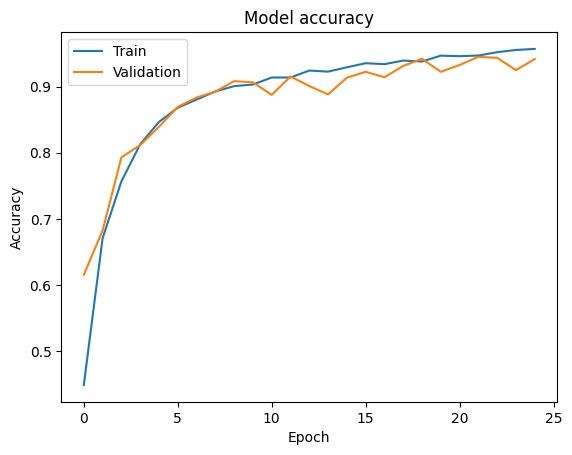

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_labels = lb.classes_

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_test_labels, y_pred_classes)
confusion_df = pd.DataFrame(confusion_mtx, index=class_labels, columns=class_labels)


85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step


In [26]:
audio_path = r"D:\sem7\DEEP_LEARNING\Vaayamoodi Summa Iru Da Strings.mp3"
audio, sample_rate = librosa.load(audio_path, sr=None)
first_40_samples = audio[:40]
input_data = np.reshape(first_40_samples, (1, 40))
prediction = model.predict(input_data)
predicted_language = np.argmax(prediction, axis=1)
print(f"Predicted language class: {predicted_language}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted language class: [2]
